In [1]:
""" dictionary records of current weather obs from UW ATG """

import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

In [2]:
atg_obs = pd.read_csv('../../Downloads/LFEM_data-.csv', low_memory=False, skiprows=1)
atg_obs

,Pseudo-Julian-Date,Date,Time,Temperature,Dewpoint,Relhum,Speed,Gust,Direction,Pressure,Solar,SumRain,Rain
0,2.451390e+06,1999-07-30,00:09,62.200000,54.500000,75.9,6.600000,9.100000,317,M,223.6,0.00,0.00
1,2.451390e+06,1999-07-30,00:10,62.100000,54.100000,75.2,7.500000,12.000000,357,M,216.8,0.00,0.00
2,2.451390e+06,1999-07-30,00:11,61.500000,53.600000,75.2,6.600000,9.100000,9,M,212.6,0.00,0.00
3,2.451390e+06,1999-07-30,00:12,62.100000,54.300000,75.7,6.300000,9.100000,345,M,211.6,0.00,0.00
4,2.451390e+06,1999-07-30,00:13,62.600000,54.800000,75.4,4.700000,9.100000,336,M,213.2,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12941709,2.460455e+06,2024-05-23,17:52,54.200000,42.000000,63.1,7.400000,10.800000,143,1017.2,225.6,969.65,0.00
12941710,2.460455e+06,2024-05-23,17:53,54.200000,41.900000,63.0,12.300000,15.300000,153,1017.2,224.1,969.65,0.00
12941711,2.460455e+06,2024-05-23,17:54,54.200000,41.800000,62.7,12.600000,14.400000,147,1017.2,223.6,969.65,0.00
12941712,2.460455e+06,2024-05-23,17:55,54.100000,41.900000,63.1,10.700000,12.600000,125,1017.2,225.3,969.65,0.00


In [3]:
atg_obs.insert(0, 'datetime_UTC', pd.to_datetime(atg_obs['Date'] + atg_obs['Time'], format='%Y-%m-%d%H:%M'))
atg_obs

,datetime_UTC,Pseudo-Julian-Date,Date,Time,Temperature,Dewpoint,Relhum,Speed,Gust,Direction,Pressure,Solar,SumRain,Rain
0,1999-07-30 00:09:00,2.451390e+06,1999-07-30,00:09,62.200000,54.500000,75.9,6.600000,9.100000,317,M,223.6,0.00,0.00
1,1999-07-30 00:10:00,2.451390e+06,1999-07-30,00:10,62.100000,54.100000,75.2,7.500000,12.000000,357,M,216.8,0.00,0.00
2,1999-07-30 00:11:00,2.451390e+06,1999-07-30,00:11,61.500000,53.600000,75.2,6.600000,9.100000,9,M,212.6,0.00,0.00
3,1999-07-30 00:12:00,2.451390e+06,1999-07-30,00:12,62.100000,54.300000,75.7,6.300000,9.100000,345,M,211.6,0.00,0.00
4,1999-07-30 00:13:00,2.451390e+06,1999-07-30,00:13,62.600000,54.800000,75.4,4.700000,9.100000,336,M,213.2,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12941709,2024-05-23 17:52:00,2.460455e+06,2024-05-23,17:52,54.200000,42.000000,63.1,7.400000,10.800000,143,1017.2,225.6,969.65,0.00
12941710,2024-05-23 17:53:00,2.460455e+06,2024-05-23,17:53,54.200000,41.900000,63.0,12.300000,15.300000,153,1017.2,224.1,969.65,0.00
12941711,2024-05-23 17:54:00,2.460455e+06,2024-05-23,17:54,54.200000,41.800000,62.7,12.600000,14.400000,147,1017.2,223.6,969.65,0.00
12941712,2024-05-23 17:55:00,2.460455e+06,2024-05-23,17:55,54.100000,41.900000,63.1,10.700000,12.600000,125,1017.2,225.3,969.65,0.00


In [7]:
# atg_obs = atg_obs.loc[(atg_obs['datetime_UTC']>=dt.datetime(2023,5,1))].copy()

In [4]:
no_erros_obs = atg_obs.loc[(atg_obs['Rain']!='M')&(atg_obs['Temperature']!='M')&(atg_obs['Pressure']!='M')&(atg_obs['Relhum']!='M')&(atg_obs['Relhum']!='0.00.')].copy()
no_erros_obs['Rain'] = no_erros_obs['Rain'].astype(float)
no_erros_obs['Temperature'] = no_erros_obs['Temperature'].astype(float)
no_erros_obs['Pressure'] = no_erros_obs['Pressure'].astype(float)
no_erros_obs['Relhum'] = no_erros_obs['Relhum'].astype(float)

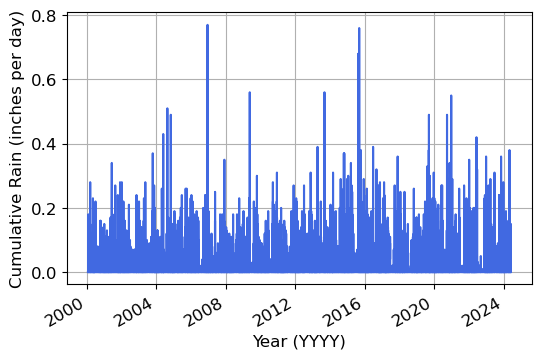

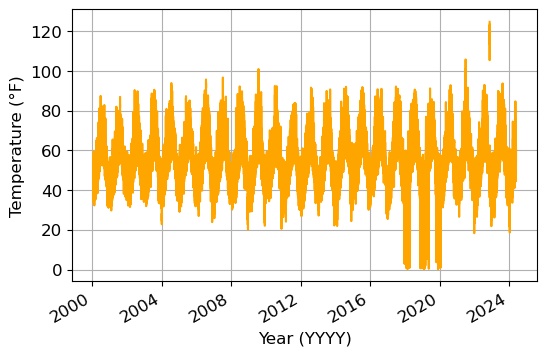

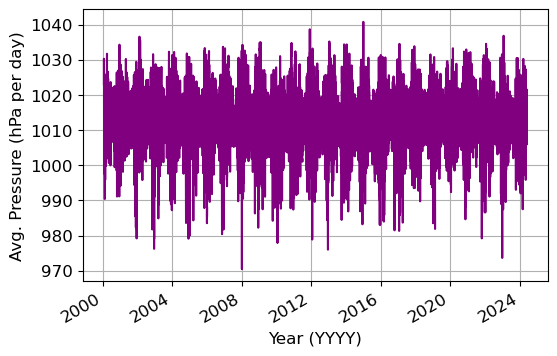

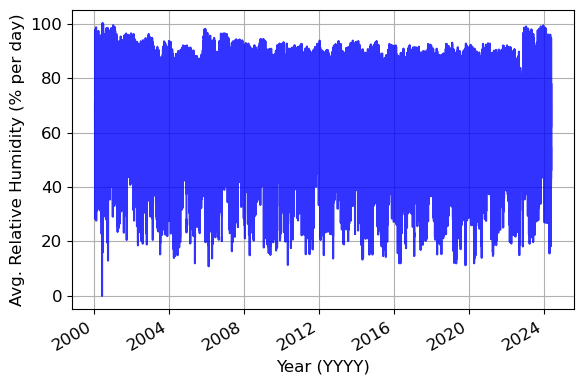

In [5]:
first_obs_each_period = no_erros_obs.resample(on='datetime_UTC', rule='1H')

summed_press_each_period = first_obs_each_period['Pressure'].mean()
summed_relhum_each_period = first_obs_each_period['Relhum'].mean()
summed_temp_each_period = first_obs_each_period['Temperature'].mean()
summed_rain_each_period = first_obs_each_period['Rain'].sum()

plt.figure(figsize=(6,4))
plt.rcParams.update({'font.size':12})
plt.plot(summed_rain_each_period.index, summed_rain_each_period.values, color='royalblue')
plt.grid(which='both')
plt.ylabel('Cumulative Rain (inches per day)')
plt.xlabel('Year (YYYY)')
plt.gcf().autofmt_xdate()

plt.figure(figsize=(6,4))
plt.rcParams.update({'font.size':12})
plt.plot(summed_temp_each_period.index, summed_temp_each_period.values, color='orange')
plt.grid(which='both')
plt.ylabel('Temperature (°F)')
plt.xlabel('Year (YYYY)')
plt.gcf().autofmt_xdate()

plt.figure(figsize=(6,4))
plt.rcParams.update({'font.size':12})
plt.plot(summed_press_each_period.index, summed_press_each_period.values, color='purple')
plt.grid(which='both')
plt.ylabel('Avg. Pressure (hPa per day)')
plt.xlabel('Year (YYYY)')
plt.gcf().autofmt_xdate()

plt.figure(figsize=(6,4))
plt.rcParams.update({'font.size':12})
plt.plot(summed_relhum_each_period.index, summed_relhum_each_period.values, color='blue', alpha=0.8)
plt.grid(which='both')
plt.ylabel('Avg. Relative Humidity (% per day)')
plt.xlabel('Year (YYYY)')
plt.gcf().autofmt_xdate()

plt.tight_layout()
plt.show()

In [6]:
no_erros_obs

,datetime_UTC,Pseudo-Julian-Date,Date,Time,Temperature,Dewpoint,Relhum,Speed,Gust,Direction,Pressure,Solar,SumRain,Rain
255060,2000-01-26 22:54:00,2.451571e+06,2000-01-26,22:54,43.8,34.700000,70.1,3.500000,4.400000,89,1023.1,44.4,19.80,0.0
255061,2000-01-26 22:55:00,2.451571e+06,2000-01-26,22:55,43.4,34.100000,69.4,2.800000,3.300000,88,1023.1,48.1,19.80,0.0
255062,2000-01-26 22:56:00,2.451571e+06,2000-01-26,22:56,43.4,34.700000,71.0,3.300000,3.800000,86,1023.1,51.5,19.80,0.0
255063,2000-01-26 22:57:00,2.451571e+06,2000-01-26,22:57,43.5,35.000000,71.7,2.600000,3.600000,91,1023.1,55.2,19.80,0.0
255064,2000-01-26 22:58:00,2.451571e+06,2000-01-26,22:58,43.2,34.400000,71.0,1.900000,2.400000,85,1023.1,58.8,19.80,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12941709,2024-05-23 17:52:00,2.460455e+06,2024-05-23,17:52,54.2,42.000000,63.1,7.400000,10.800000,143,1017.2,225.6,969.65,0.0
12941710,2024-05-23 17:53:00,2.460455e+06,2024-05-23,17:53,54.2,41.900000,63.0,12.300000,15.300000,153,1017.2,224.1,969.65,0.0
12941711,2024-05-23 17:54:00,2.460455e+06,2024-05-23,17:54,54.2,41.800000,62.7,12.600000,14.400000,147,1017.2,223.6,969.65,0.0
12941712,2024-05-23 17:55:00,2.460455e+06,2024-05-23,17:55,54.1,41.900000,63.1,10.700000,12.600000,125,1017.2,225.3,969.65,0.0


In [7]:
first_obs_each_period = no_erros_obs.resample(on='datetime_UTC', rule='1H')
summed_rain_each_period = first_obs_each_period['Rain'].sum()

In [8]:
lightrainfall_times = summed_rain_each_period[(summed_rain_each_period<0.10)&(summed_rain_each_period>0.0)]
moderaterainfall_times = summed_rain_each_period[(summed_rain_each_period<0.30)&(summed_rain_each_period>0.10)]
heavyrainfall_times = summed_rain_each_period[(summed_rain_each_period>0.30)]
lightrainfall_times

datetime_UTC
2000-01-31 01:00:00    0.01
2000-01-31 15:00:00    0.01
2000-02-01 02:00:00    0.04
2000-02-01 03:00:00    0.07
2000-02-01 04:00:00    0.04
                       ... 
2024-05-21 23:00:00    0.09
2024-05-22 00:00:00    0.09
2024-05-22 01:00:00    0.03
2024-05-22 08:00:00    0.02
2024-05-22 11:00:00    0.07
Name: Rain, Length: 18592, dtype: float64

In [9]:
rain_thresh = 0.01
summed_temp_each_period.loc[(summed_rain_each_period>=rain_thresh)].dropna().sort_values()

datetime_UTC
2019-02-02 00:00:00     0.370000
2019-02-15 03:00:00     0.440000
2018-03-02 09:00:00     0.511667
2019-02-15 00:00:00     0.601667
2018-11-27 09:00:00     0.678333
                         ...    
2007-06-01 00:00:00    78.928333
2014-08-25 21:00:00    78.955000
2015-08-12 23:00:00    79.068333
2007-04-06 23:00:00    79.240000
2014-08-12 04:00:00    80.368333
Name: Temperature, Length: 20500, dtype: float64

In [10]:
summed_temp_each_period.loc[(summed_rain_each_period>=rain_thresh)]

datetime_UTC
2000-01-31 01:00:00    44.810000
2000-01-31 15:00:00    41.080000
2000-02-01 02:00:00    46.625000
2000-02-01 03:00:00    44.013333
2000-02-01 04:00:00    43.331667
                         ...    
2024-05-22 01:00:00    52.688333
2024-05-22 08:00:00    48.051667
2024-05-22 09:00:00    47.235000
2024-05-22 10:00:00    46.291667
2024-05-22 11:00:00    44.815000
Name: Temperature, Length: 20500, dtype: float64

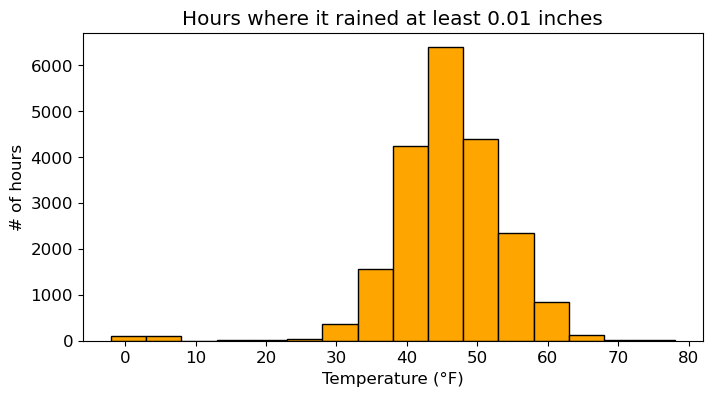

In [11]:
bin_wdth = 5
rain_counts, temps = np.histogram(summed_temp_each_period.loc[(summed_rain_each_period>=rain_thresh)], bins=np.arange(0,80+bin_wdth,bin_wdth))

plt.figure(figsize=(8,4))
plt.title(f'Hours where it rained at least {rain_thresh} inches')
plt.bar(x=np.arange(0,80,bin_wdth)+0.5, width=bin_wdth, height=rain_counts, facecolor='orange', edgecolor='k', alpha=1)
plt.xticks(np.arange(0, 80+bin_wdth, 10))
plt.ylabel('# of hours')
plt.xlabel('Temperature (°F)')
plt.show()

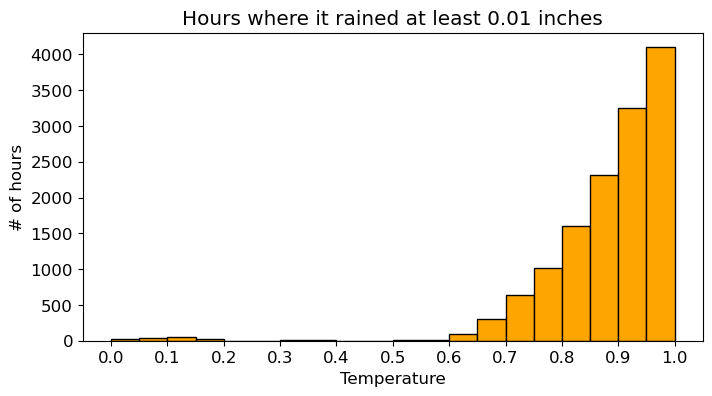

In [12]:
vals = summed_temp_each_period.loc[(summed_rain_each_period>rain_thresh)].sort_values()
med_val = vals.median()
dif_vals = np.abs(vals-med_val)
max_normval = dif_vals.max()
norm_vals = 1-(dif_vals/max_normval)

bin_wdth = 0.05
rain_counts, temps = np.histogram(norm_vals, bins=np.arange(0,1+bin_wdth,bin_wdth))

plt.figure(figsize=(8,4))
plt.title(f'Hours where it rained at least {rain_thresh} inches')
plt.bar(x=np.arange(0,1,bin_wdth)+bin_wdth/2, width=bin_wdth, height=rain_counts, facecolor='orange', edgecolor='k', alpha=1)
plt.xticks(np.arange(0, 1+bin_wdth, 0.1))
plt.ylabel('# of hours')
plt.xlabel('Temperature')
plt.show()

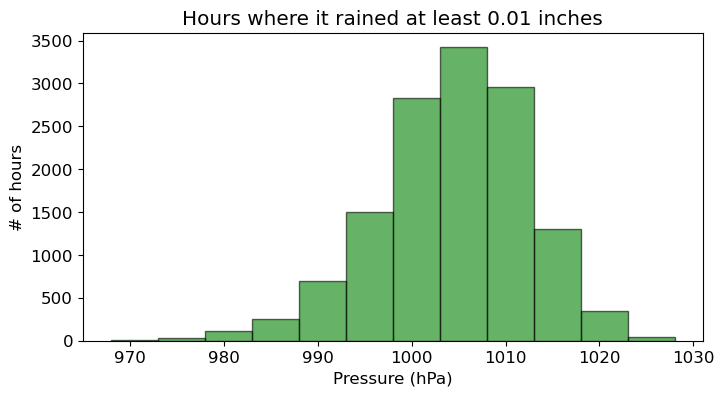

In [13]:
bin_wdth = 5
rain_counts, temps = np.histogram(summed_press_each_period.loc[(summed_rain_each_period>rain_thresh)].dropna(), bins=np.arange(970,1030+bin_wdth, bin_wdth))

plt.figure(figsize=(8,4))
plt.title(f'Hours where it rained at least {rain_thresh} inches')
plt.bar(x=np.arange(970,1030, bin_wdth)+0.5, width=bin_wdth, height=rain_counts, facecolor='green', edgecolor='k', alpha=0.6)
plt.xticks(np.arange(970, 1030+bin_wdth, 10))
plt.ylabel('# of hours')
plt.xlabel('Pressure (hPa)')
plt.show()

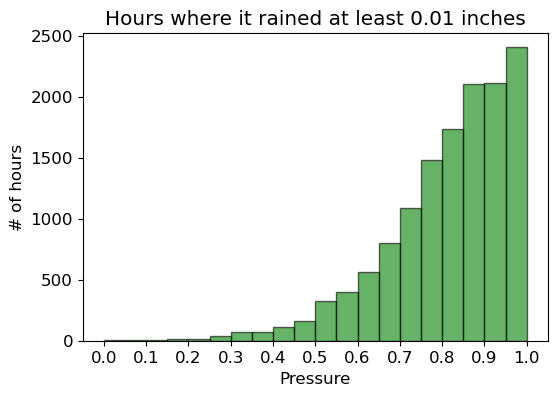

In [14]:
vals = summed_press_each_period.loc[(summed_rain_each_period>rain_thresh)].sort_values()
med_val = vals.median()
dif_vals = np.abs(vals-med_val)
max_normval = dif_vals.max()
norm_vals = 1-(dif_vals/max_normval)

bin_wdth = 0.05
rain_counts, temps = np.histogram(norm_vals, bins=np.arange(0,1+bin_wdth, bin_wdth))

plt.figure(figsize=(6,4))
plt.title(f'Hours where it rained at least {rain_thresh} inches')
plt.bar(x=np.arange(0,1, bin_wdth)+bin_wdth/2, width=bin_wdth, height=rain_counts, facecolor='green', edgecolor='k', alpha=0.6)
plt.xticks(np.arange(0, 1+bin_wdth, 2*bin_wdth))
plt.ylabel('# of hours')
plt.xlabel('Pressure')
plt.show()

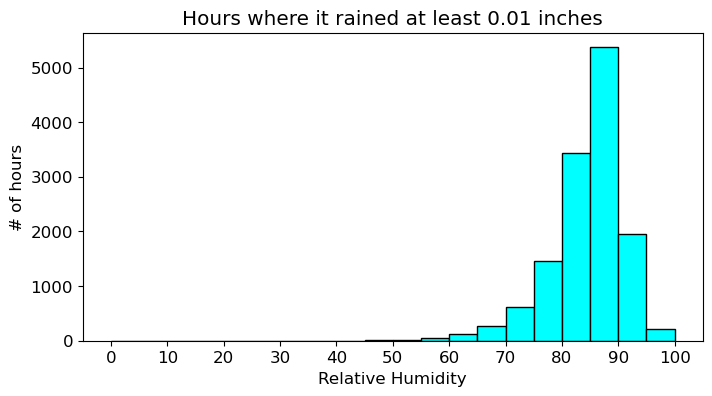

In [15]:
bin_wdth = 5
rain_counts, temps = np.histogram((summed_relhum_each_period.loc[(summed_rain_each_period>rain_thresh)].dropna()), bins=np.arange(0,100+bin_wdth,bin_wdth))

plt.figure(figsize=(8,4))
plt.title(f'Hours where it rained at least {rain_thresh} inches')
plt.bar(x=np.arange(0,100,bin_wdth)+bin_wdth/2, width=bin_wdth, height=rain_counts, facecolor='cyan', edgecolor='k', alpha=1)
plt.xticks(np.arange(0, 100+bin_wdth, 10))
plt.ylabel('# of hours')
plt.xlabel('Relative Humidity')
plt.show()

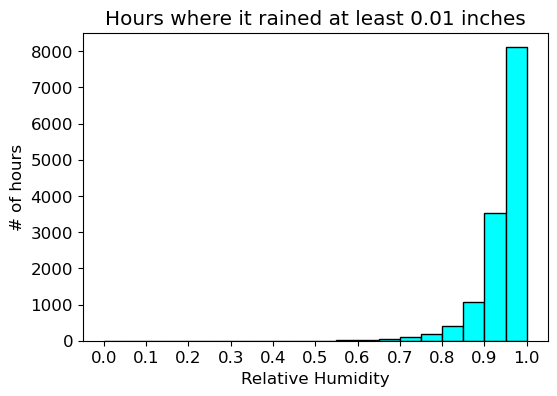

In [16]:
vals = summed_relhum_each_period.loc[(summed_rain_each_period>rain_thresh)].sort_values()
med_val = vals.median()
dif_vals = np.abs(vals-med_val)
max_normval = dif_vals.max()
norm_vals = 1-(dif_vals/max_normval)

bin_wdth = 0.05
rain_counts, temps = np.histogram(norm_vals, bins=np.arange(0,1+bin_wdth,bin_wdth))

plt.figure(figsize=(6,4))
plt.title(f'Hours where it rained at least {rain_thresh} inches')
plt.bar(x=np.arange(0,0.99,bin_wdth)+bin_wdth/2, width=bin_wdth, height=rain_counts, facecolor='cyan', edgecolor='k', alpha=1)
plt.xticks(np.arange(0, 1.1, 0.1))
plt.ylabel('# of hours')
plt.xlabel('Relative Humidity')
plt.show()

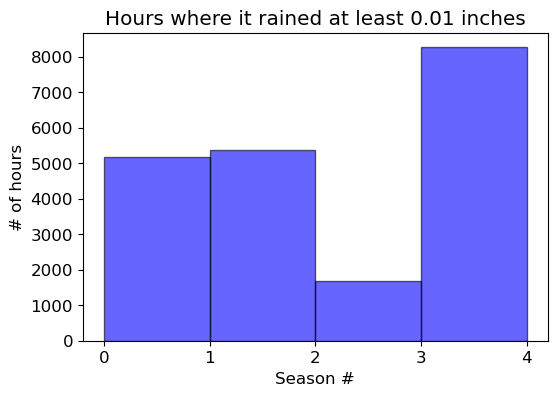

array([5174, 5378, 1690, 8258])

In [17]:
rain_counts, months = np.histogram(pd.DatetimeIndex(summed_rain_each_period[(summed_rain_each_period>=rain_thresh)].index).month // 3, bins=np.arange(0,5))

plt.figure(figsize=(6,4))
plt.title(f'Hours where it rained at least {rain_thresh} inches')
plt.bar(x=np.arange(0,4)+0.5, width=1, height=rain_counts, facecolor='blue', edgecolor='k', alpha=0.6)
plt.xticks(np.arange(0, 5))
plt.ylabel('# of hours')
plt.xlabel('Season #')
plt.show()
rain_counts

In [18]:
pd.DatetimeIndex(summed_rain_each_period[(summed_rain_each_period>=rain_thresh)].index).year

Index([2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000,
       ...
       2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024],
      dtype='int32', name='datetime_UTC', length=20500)

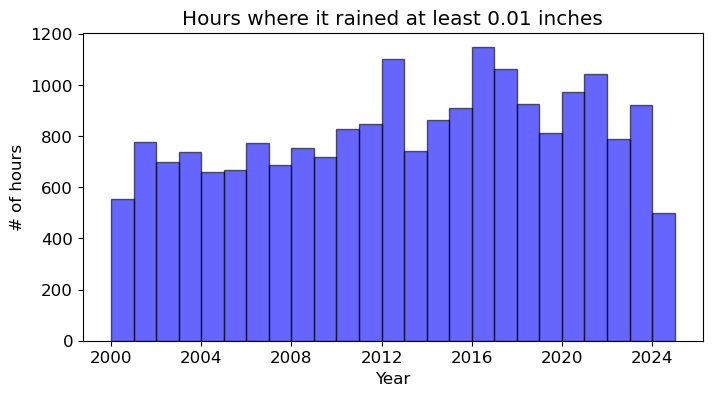

array([ 554,  778,  700,  736,  658,  667,  773,  688,  755,  720,  829,
        849, 1101,  743,  864,  910, 1147, 1063,  926,  812,  972, 1042,
        790,  922,  501])

In [22]:
rain_counts, months = np.histogram(pd.DatetimeIndex(summed_rain_each_period[(summed_rain_each_period>=rain_thresh)].index).year, bins=np.arange(2000,2026))

plt.figure(figsize=(8,4))
plt.title(f'Hours where it rained at least {rain_thresh} inches')
plt.bar(x=np.arange(2000,2025)+0.5, width=1, height=rain_counts, facecolor='blue', edgecolor='k', alpha=0.6)
plt.xticks(np.arange(2000,2025, 4))
plt.ylabel('# of hours')
plt.xlabel('Year')
plt.show()
rain_counts

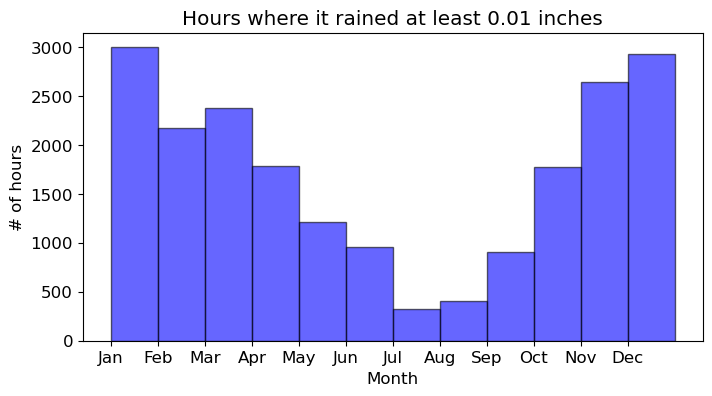

array([2997, 2177, 2374, 1786, 1218,  962,  324,  404,  902, 1780, 2648,
       2928])

In [73]:
rain_counts, months = np.histogram(pd.DatetimeIndex(summed_rain_each_period[(summed_rain_each_period>=rain_thresh)].index).month, bins=np.arange(1,14))

plt.figure(figsize=(8,4))
plt.title(f'Hours where it rained at least {rain_thresh} inches')
plt.bar(x=np.arange(1,13)+0.5, width=1, height=rain_counts, facecolor='blue', edgecolor='k', alpha=0.6)
plt.xticks(np.arange(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.ylabel('# of hours')
plt.xlabel('Month')
plt.show()
rain_counts

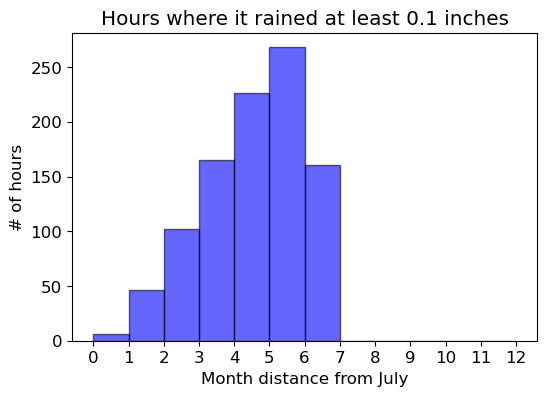

array([  6,  46, 102, 165, 226, 268, 161,   0,   0,   0,   0,   0])

In [120]:
rain_counts, months = np.histogram(np.abs(pd.DatetimeIndex(summed_rain_each_period[(summed_rain_each_period>=rain_thresh)].index).month - 7), bins=np.arange(0,13))

plt.figure(figsize=(6,4))
plt.title(f'Hours where it rained at least {rain_thresh} inches')
plt.bar(x=np.arange(0,12)+0.5, width=1, height=rain_counts, facecolor='blue', edgecolor='k', alpha=0.6)
plt.xticks(np.arange(0, 13))
plt.ylabel('# of hours')
plt.xlabel('Month distance from July')
plt.show()
rain_counts

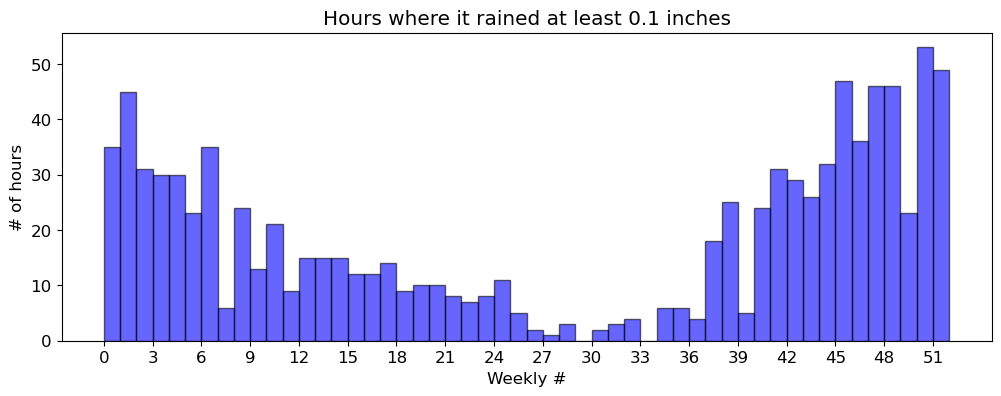

In [21]:
rain_counts, doy = np.histogram(pd.DatetimeIndex(summed_rain_each_period[(summed_rain_each_period>=rain_thresh)].index).dayofyear // 7, bins=np.arange(0,53))

plt.figure(figsize=(12,4))
plt.title(f'Hours where it rained at least {rain_thresh} inches')
plt.bar(x=np.arange(0,52)+0.5, width=1, height=rain_counts, facecolor='blue', edgecolor='k', alpha=0.6)
plt.xticks(np.arange(0, 53, 3))
plt.ylabel('# of hours')
plt.xlabel('Weekly #')
plt.show()

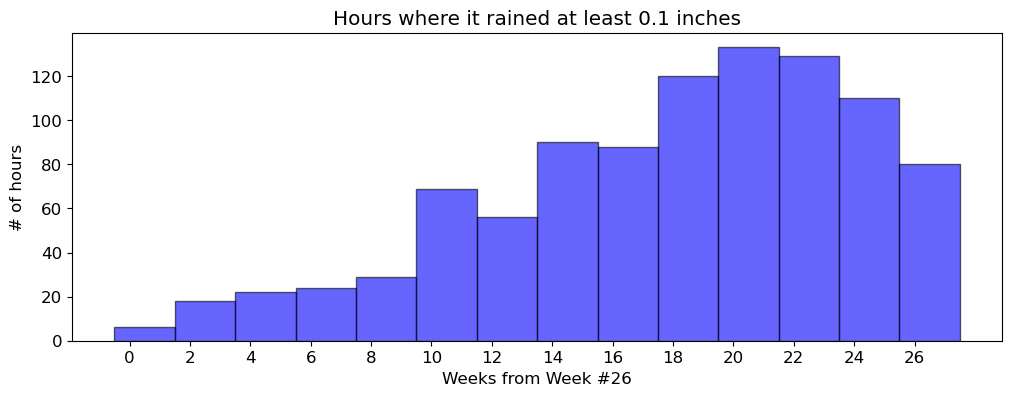

In [22]:
bin_wdth = 2
rain_counts, doy = np.histogram(np.abs((pd.DatetimeIndex(summed_rain_each_period[(summed_rain_each_period>=rain_thresh)].index).dayofyear // 7) - 27), bins=np.arange(0,28+bin_wdth,bin_wdth))

plt.figure(figsize=(12,4))
plt.title(f'Hours where it rained at least {rain_thresh} inches')
plt.bar(x=np.arange(0,27,bin_wdth)+0.5, width=bin_wdth, height=rain_counts, facecolor='blue', edgecolor='k', alpha=0.6)
plt.xticks(np.arange(0, 28,bin_wdth))
plt.ylabel('# of hours')
plt.xlabel('Weeks from Week #26')
plt.show()

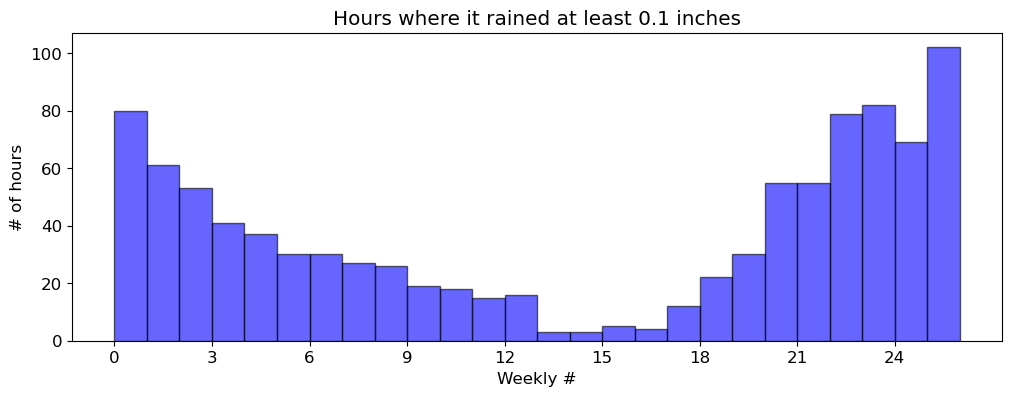

In [23]:
rain_counts, doy = np.histogram(pd.DatetimeIndex(summed_rain_each_period[(summed_rain_each_period>=rain_thresh)].index).dayofyear // 14, bins=np.arange(0,27))

plt.figure(figsize=(12,4))
plt.title(f'Hours where it rained at least {rain_thresh} inches')
plt.bar(x=np.arange(0,26)+0.5, width=1, height=rain_counts, facecolor='blue', edgecolor='k', alpha=0.6)
plt.xticks(np.arange(0, 27, 3))
plt.ylabel('# of hours')
plt.xlabel('Weekly #')
plt.show()

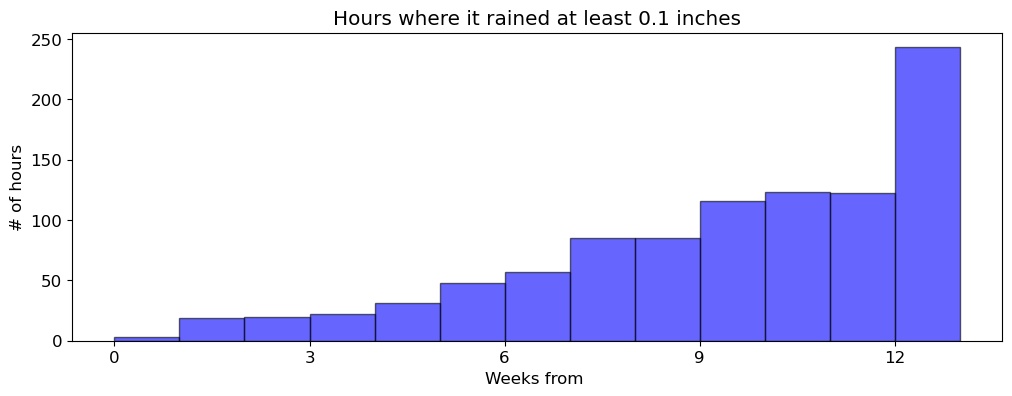

In [24]:
rain_counts, doy = np.histogram(np.abs((pd.DatetimeIndex(summed_rain_each_period[(summed_rain_each_period>=rain_thresh)].index).dayofyear // 14) - 13), bins=np.arange(0,14))

plt.figure(figsize=(12,4))
plt.title(f'Hours where it rained at least {rain_thresh} inches')
plt.bar(x=np.arange(0,13)+0.5, width=1, height=rain_counts, facecolor='blue', edgecolor='k', alpha=0.6)
plt.xticks(np.arange(0, 14, 3))
plt.ylabel('# of hours')
plt.xlabel('Weeks from ')
plt.show()

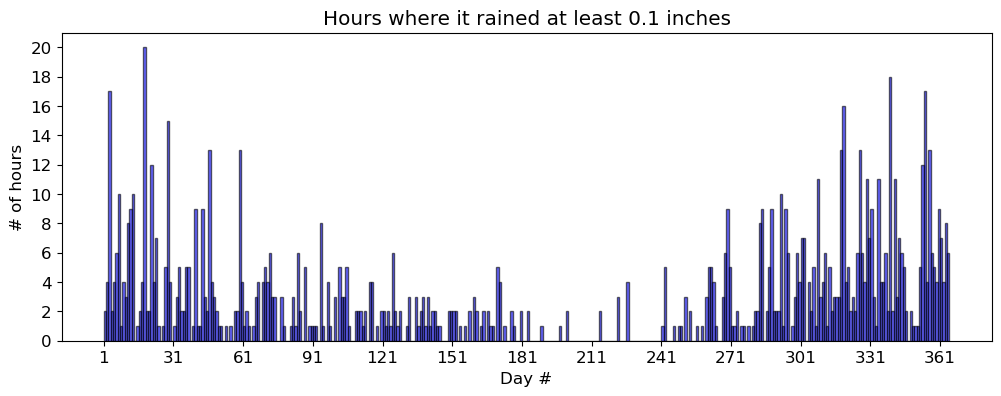

In [25]:
rain_counts, doy = np.histogram(pd.DatetimeIndex(summed_rain_each_period[(summed_rain_each_period>=rain_thresh)].index).dayofyear, bins=np.arange(1,366))

plt.figure(figsize=(12,4))
plt.title(f'Hours where it rained at least {rain_thresh} inches')
plt.bar(x=np.arange(1,365)+0.5, width=1, height=rain_counts, facecolor='blue', edgecolor='k', alpha=0.6)
plt.xticks(np.arange(1, 366, 30))
plt.yticks(np.arange(0, rain_counts.max()+2, 2))
plt.ylabel('# of hours')
plt.xlabel('Day #')
plt.show()

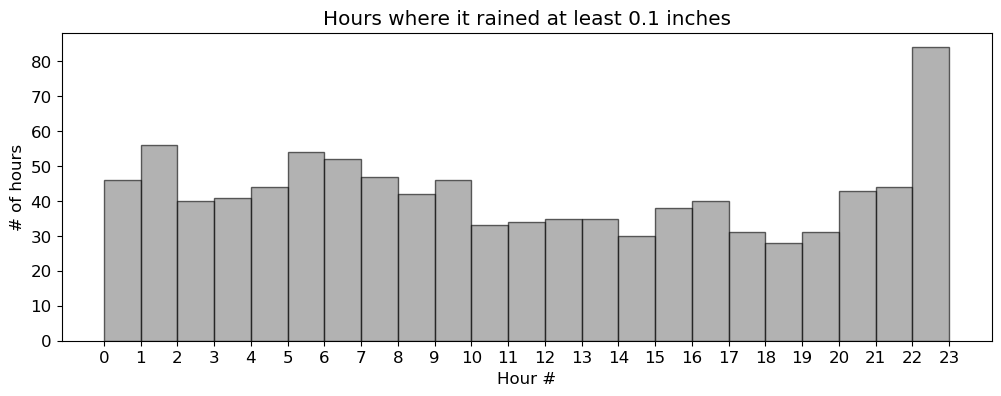

array([46, 56, 40, 41, 44, 54, 52, 47, 42, 46, 33, 34, 35, 35, 30, 38, 40,
       31, 28, 31, 43, 44, 84])

In [26]:
rain_counts, times = np.histogram(pd.DatetimeIndex(summed_rain_each_period[(summed_rain_each_period>=rain_thresh)].index).hour, bins=np.arange(0,24))

plt.figure(figsize=(12,4))
plt.title(f'Hours where it rained at least {rain_thresh} inches')
plt.bar(x=np.arange(0,23)+0.5, width=1, height=rain_counts, facecolor='grey', edgecolor='k', alpha=0.6)
plt.xticks(np.arange(0, 24))
plt.ylabel('# of hours')
plt.xlabel('Hour #')
plt.show()
rain_counts

In [78]:
((summed_rain_each_period[(summed_rain_each_period>=rain_thresh)].index).tz_localize('UTC').tz_convert('US/Pacific').hour)

Index([13, 18, 13, 14, 15, 16,  6, 20, 21, 22,
       ...
       23,  0,  3,  4, 17, 18,  0,  4,  2,  3],
      dtype='int32', name='datetime_UTC', length=974)

In [79]:
((summed_rain_each_period[(summed_rain_each_period>=rain_thresh)].index).tz_localize('UTC').tz_convert('US/Pacific').hour - 4)%24

Index([ 9, 14,  9, 10, 11, 12,  2, 16, 17, 18,
       ...
       19, 20, 23,  0, 13, 14, 20,  0, 22, 23],
      dtype='int32', name='datetime_UTC', length=974)

In [80]:
((summed_rain_each_period[(summed_rain_each_period>=rain_thresh)].index).tz_localize('UTC').tz_convert('US/Pacific').hour - 4)%24 // 6

Index([1, 2, 1, 1, 1, 2, 0, 2, 2, 3,
       ...
       3, 3, 3, 0, 2, 2, 3, 0, 3, 3],
      dtype='int32', name='datetime_UTC', length=974)

In [59]:
(((summed_rain_each_period[(summed_rain_each_period>=rain_thresh)].index) - pd.Timedelta(hours=10)).hour%24)//6

Index([1, 2, 1, 1, 2, 2, 0, 2, 3, 3,
       ...
       3, 3, 0, 0, 2, 2, 3, 0, 3, 0],
      dtype='int32', name='datetime_UTC', length=974)

In [51]:
(((summed_rain_each_period[(summed_rain_each_period>=rain_thresh)].index) - pd.Timedelta(hours=7)).hour - 2)%24 // 6

Index([1, 2, 1, 2, 2, 2, 0, 3, 3, 3,
       ...
       3, 3, 0, 0, 2, 2, 3, 0, 0, 0],
      dtype='int32', name='datetime_UTC', length=974)

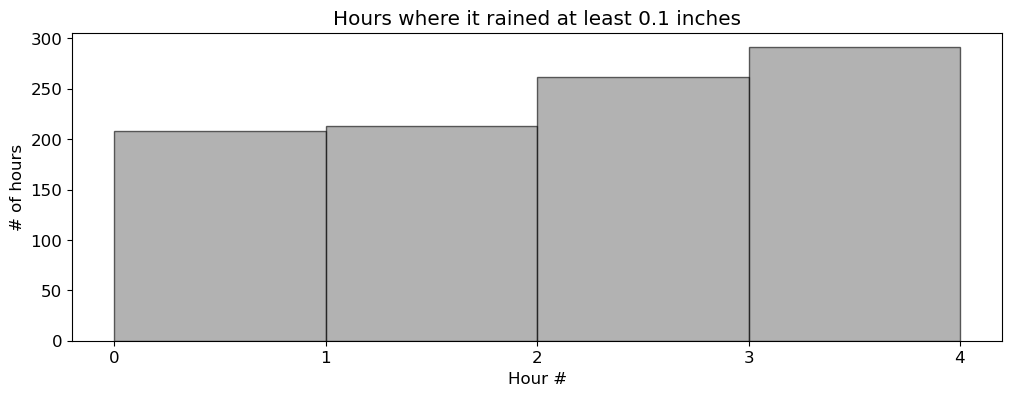

array([208, 213, 262, 291])

In [97]:
rain_counts, times = np.histogram(((summed_rain_each_period[(summed_rain_each_period>=rain_thresh)].index).tz_localize('UTC').tz_convert('US/Pacific').hour - 2)%24 // 6, bins=np.arange(0,5))

plt.figure(figsize=(12,4))
plt.title(f'Hours where it rained at least {rain_thresh} inches')
plt.bar(x=np.arange(0,4)+0.5, width=1, height=rain_counts, facecolor='grey', edgecolor='k', alpha=0.6)
plt.xticks(np.arange(0, 5))
plt.ylabel('# of hours')
plt.xlabel('Hour #')
plt.show()
rain_counts

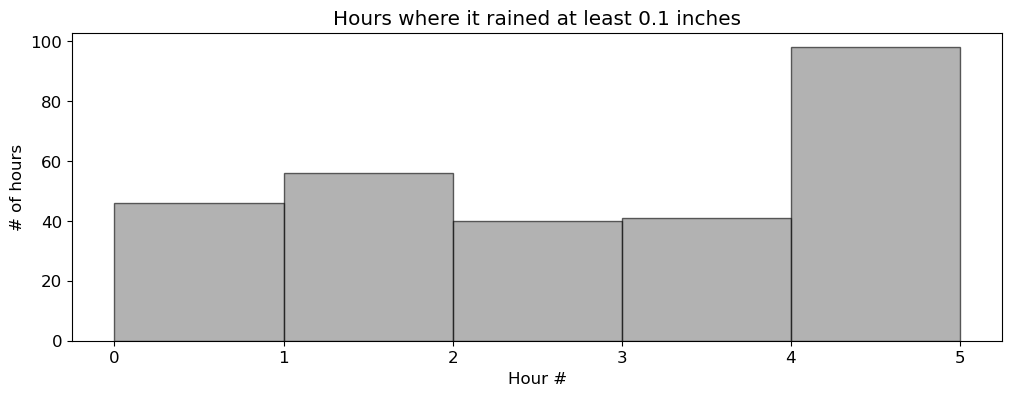

array([46, 56, 40, 41, 98])

In [29]:
rain_counts, times = np.histogram(pd.DatetimeIndex(summed_rain_each_period[(summed_rain_each_period>=rain_thresh)].index).hour, bins=np.arange(0,6))

plt.figure(figsize=(12,4))
plt.title(f'Hours where it rained at least {rain_thresh} inches')
plt.bar(x=np.arange(0,5)+0.5, width=1, height=rain_counts, facecolor='grey', edgecolor='k', alpha=0.6)
plt.xticks(np.arange(0, 6))
plt.ylabel('# of hours')
plt.xlabel('Hour #')
plt.show()
rain_counts

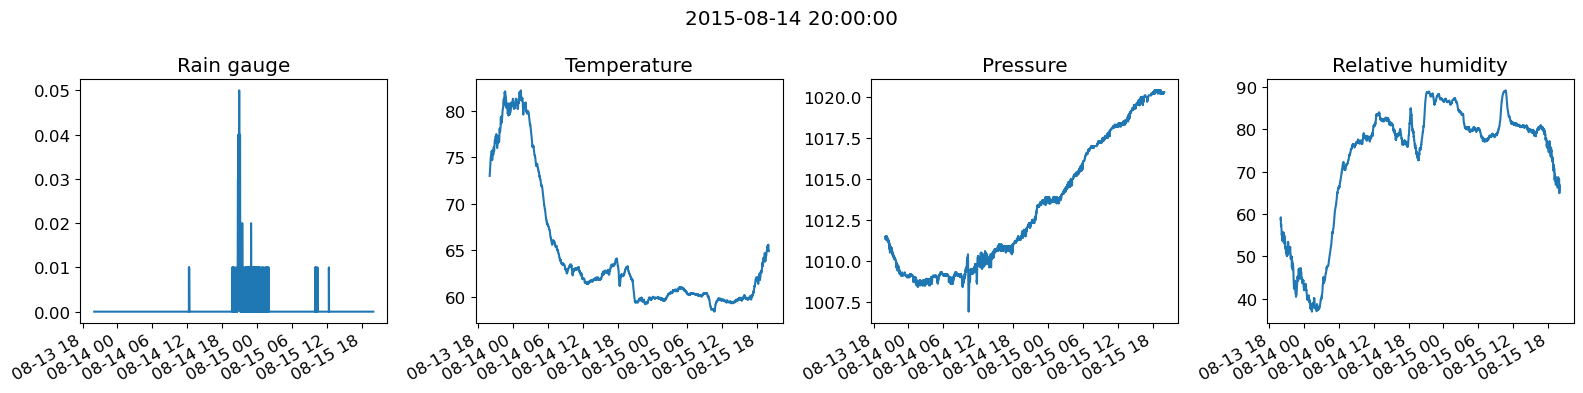

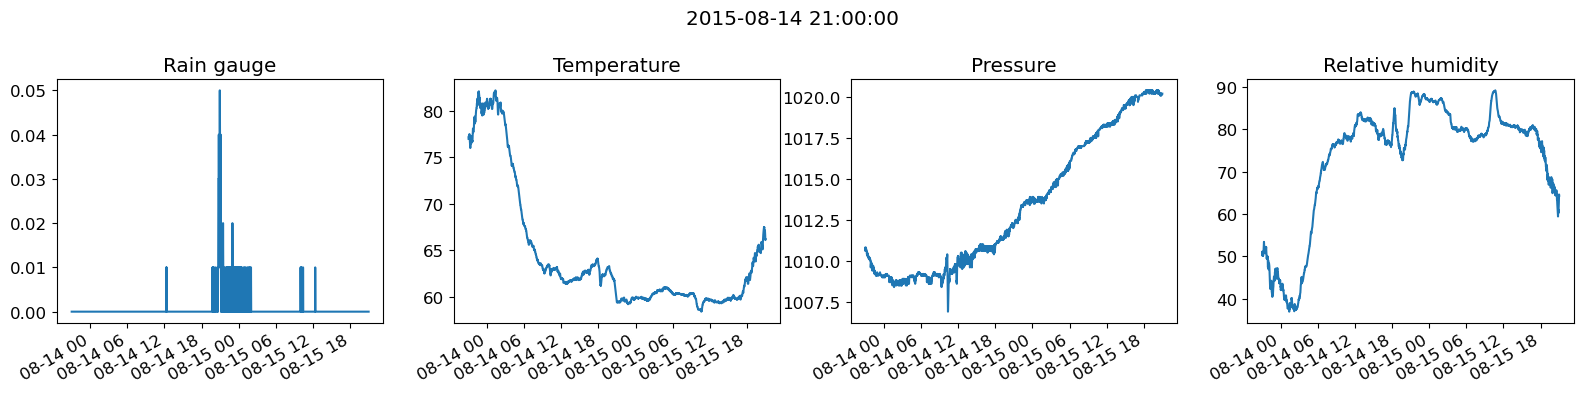

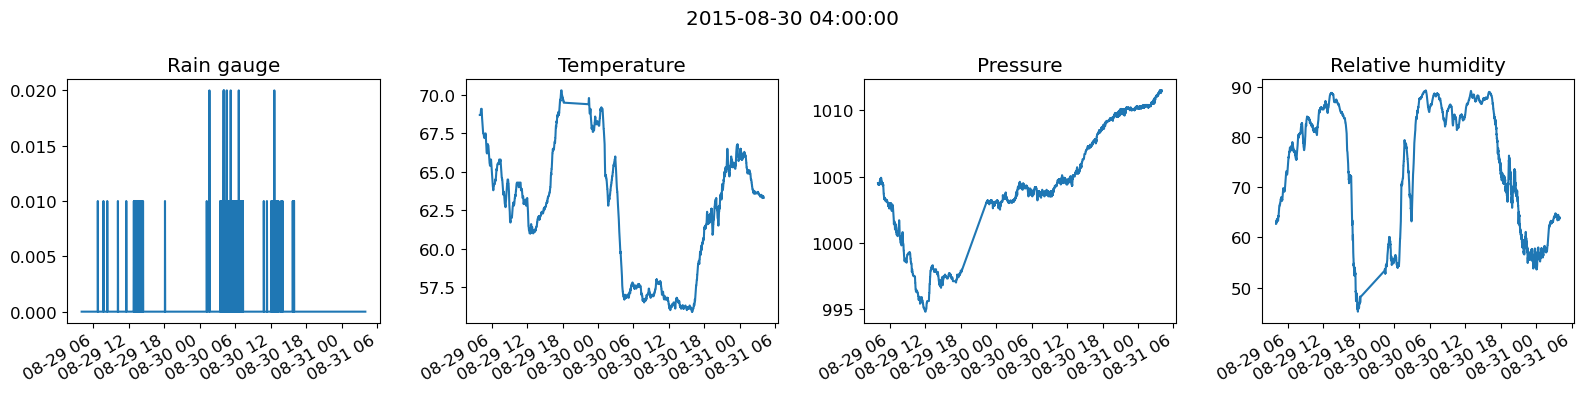

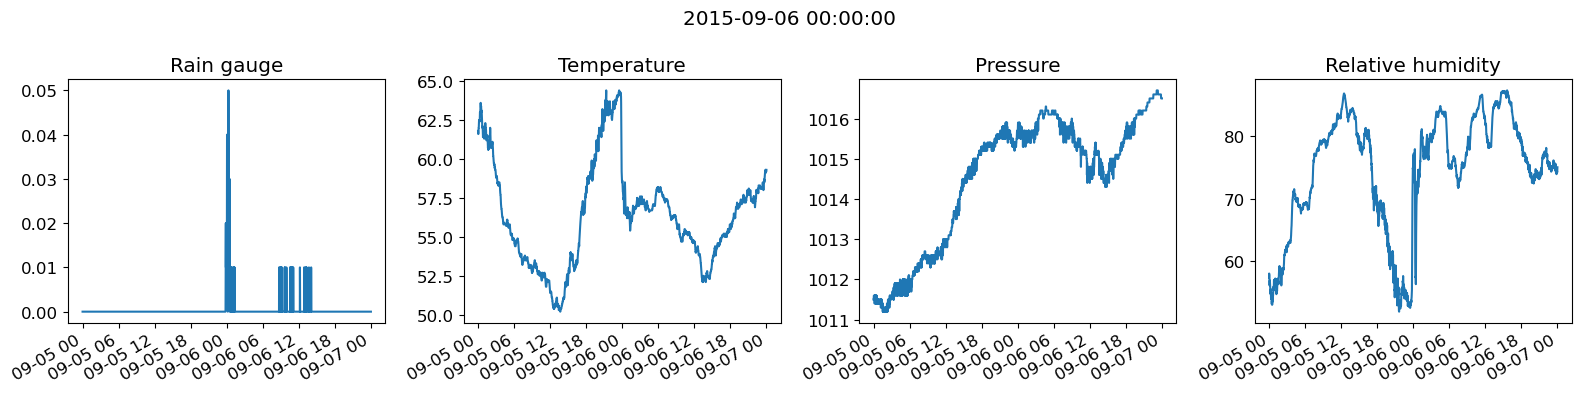

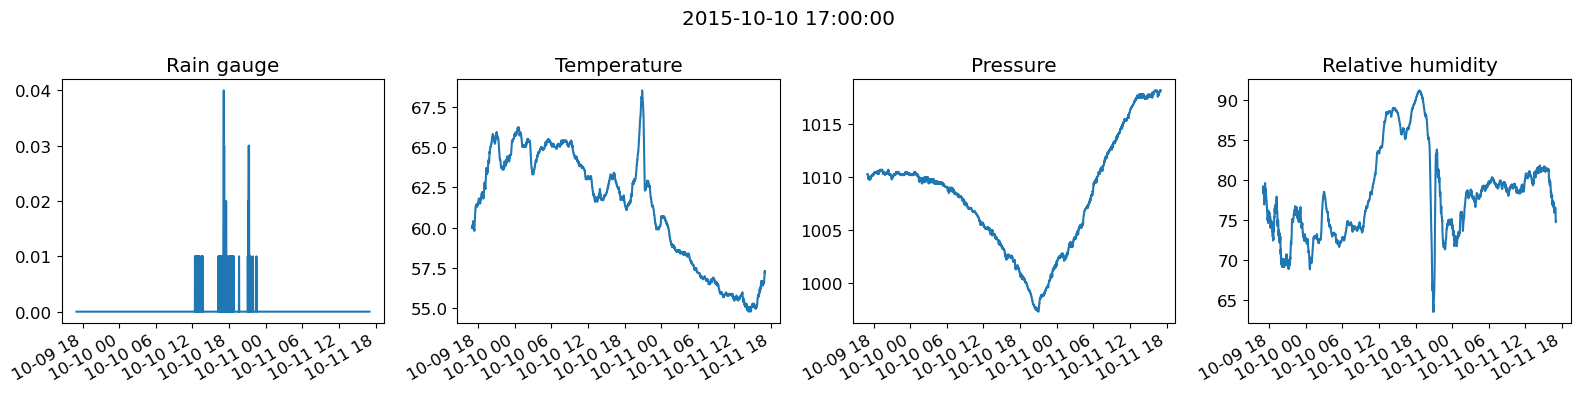

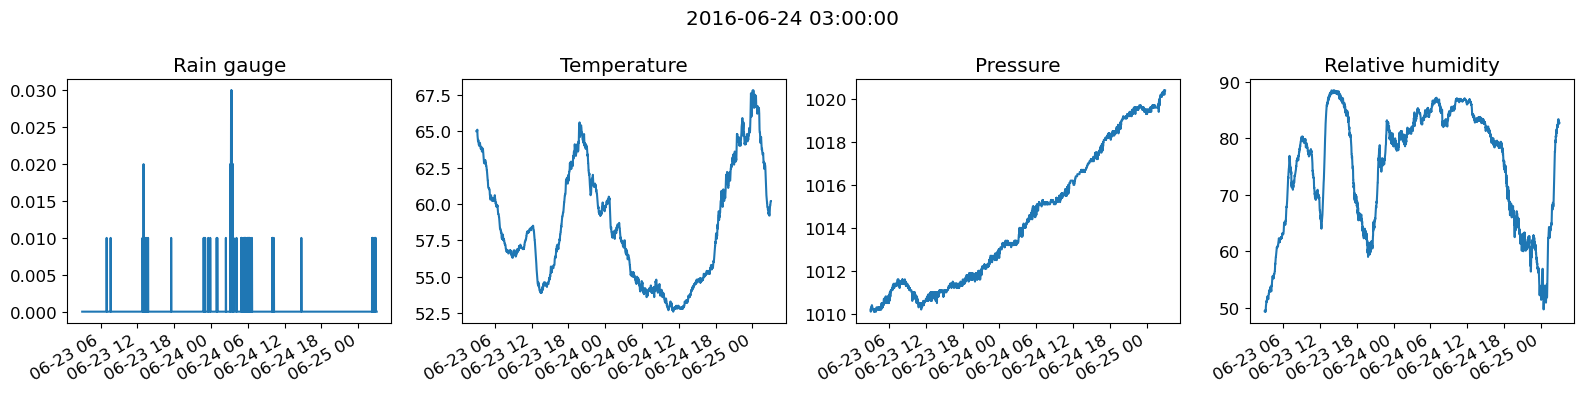

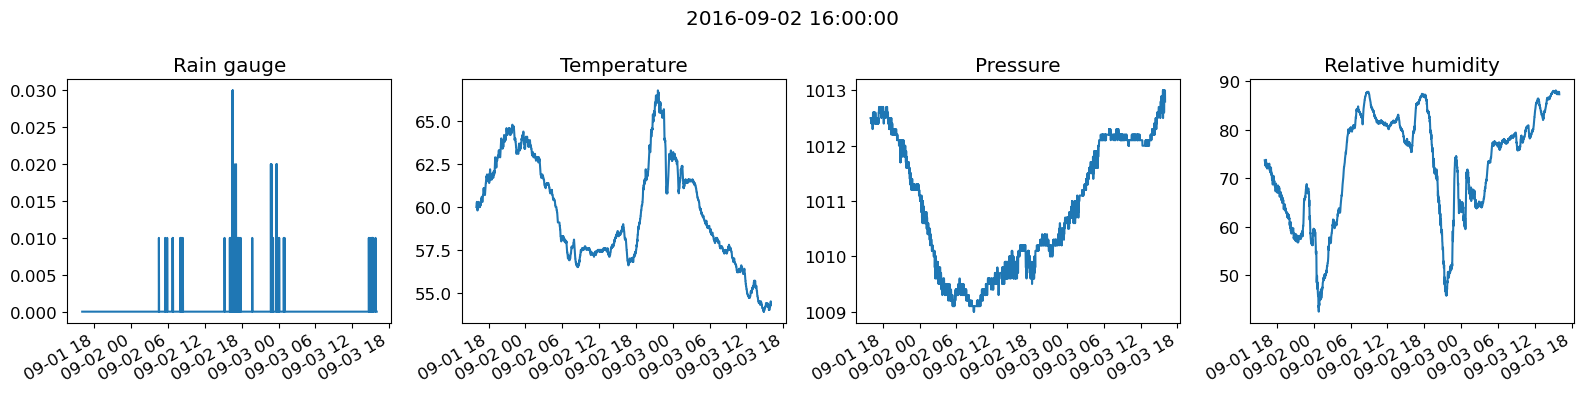

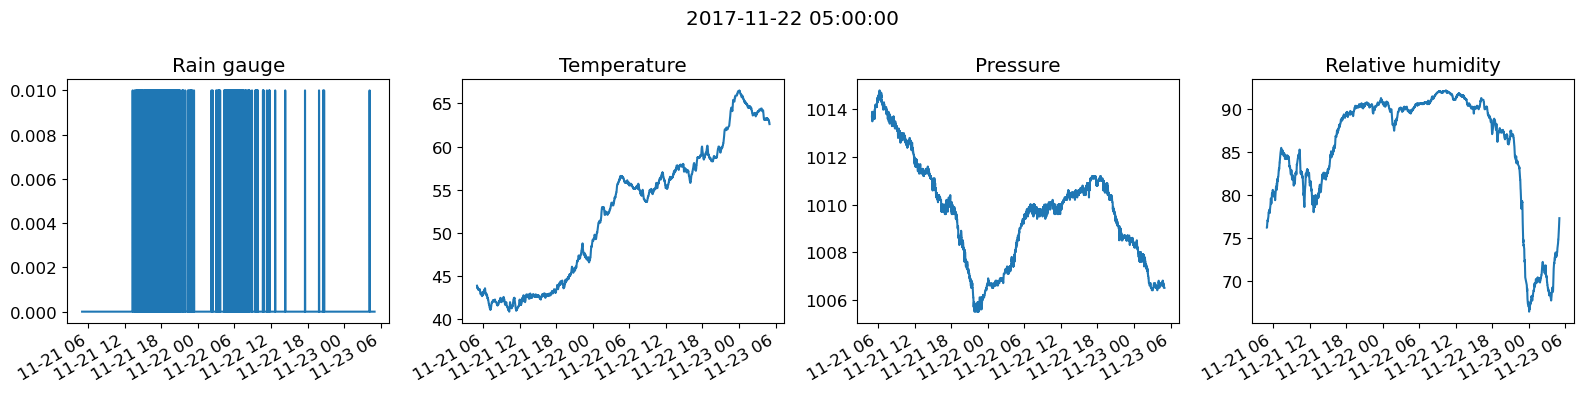

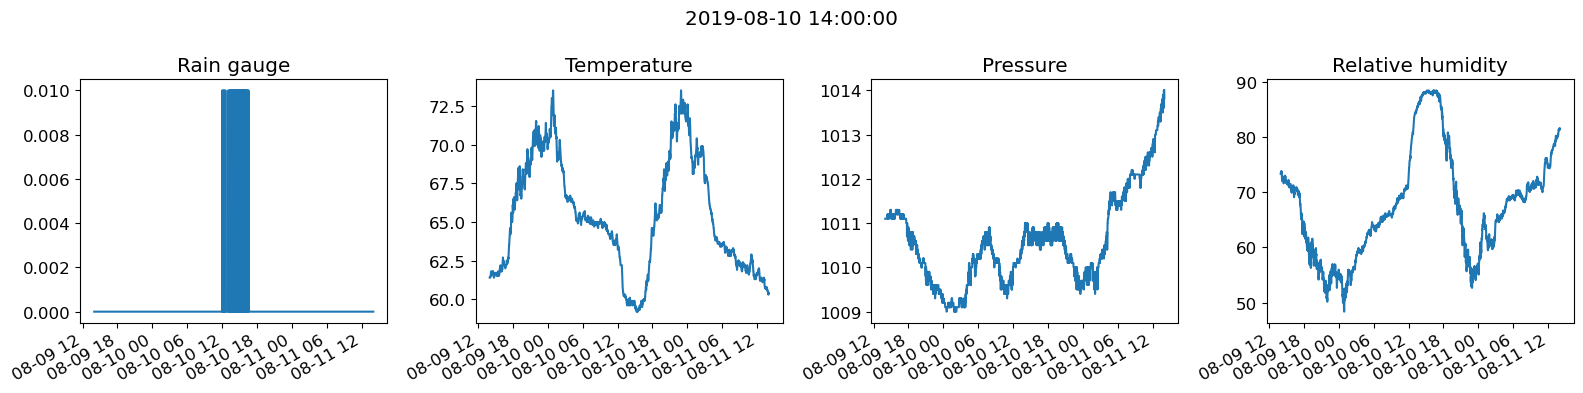

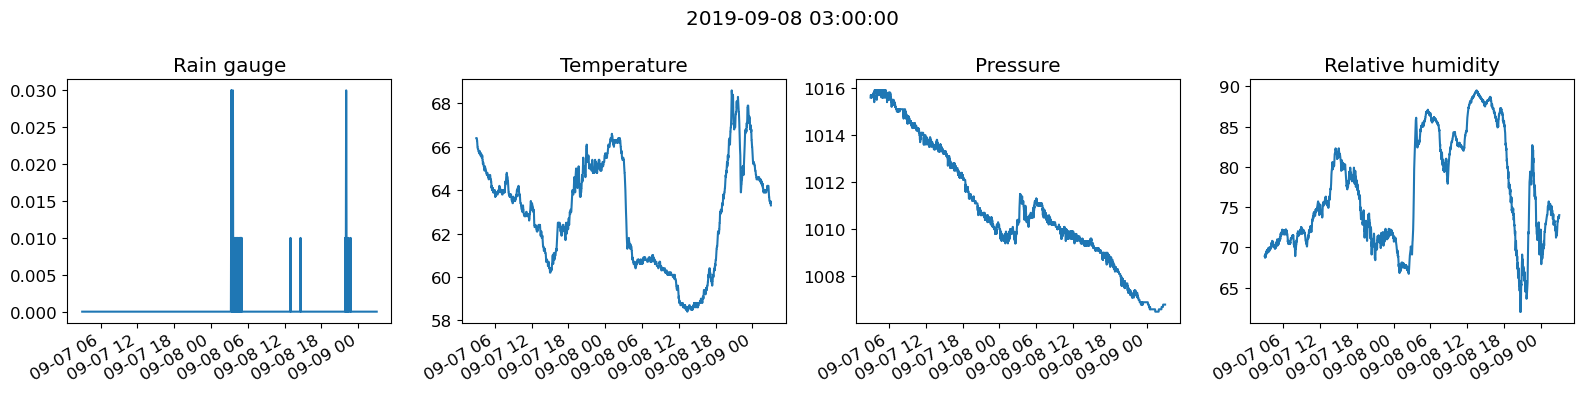

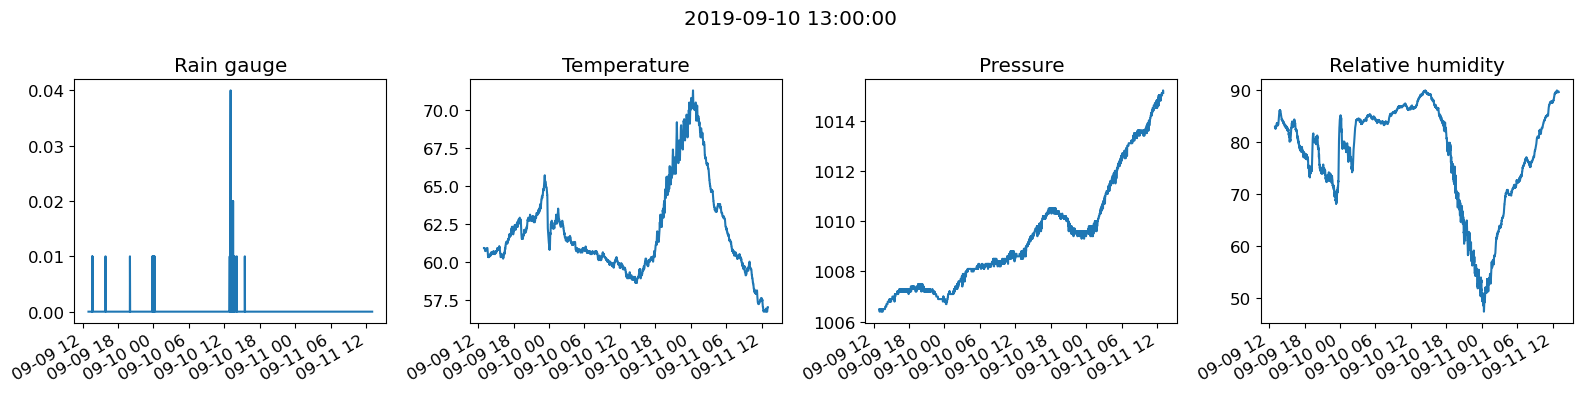

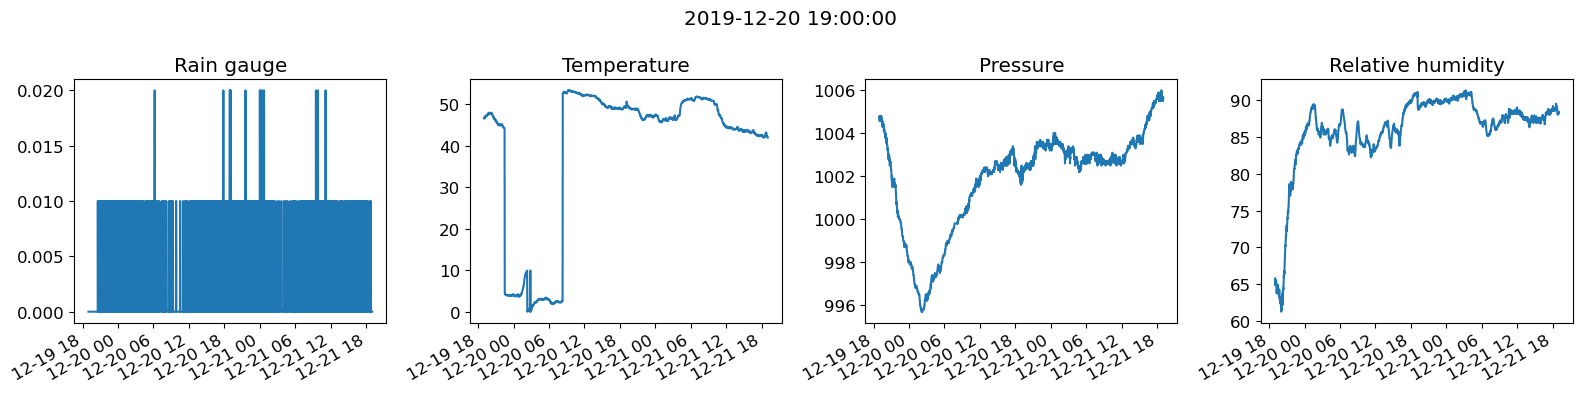

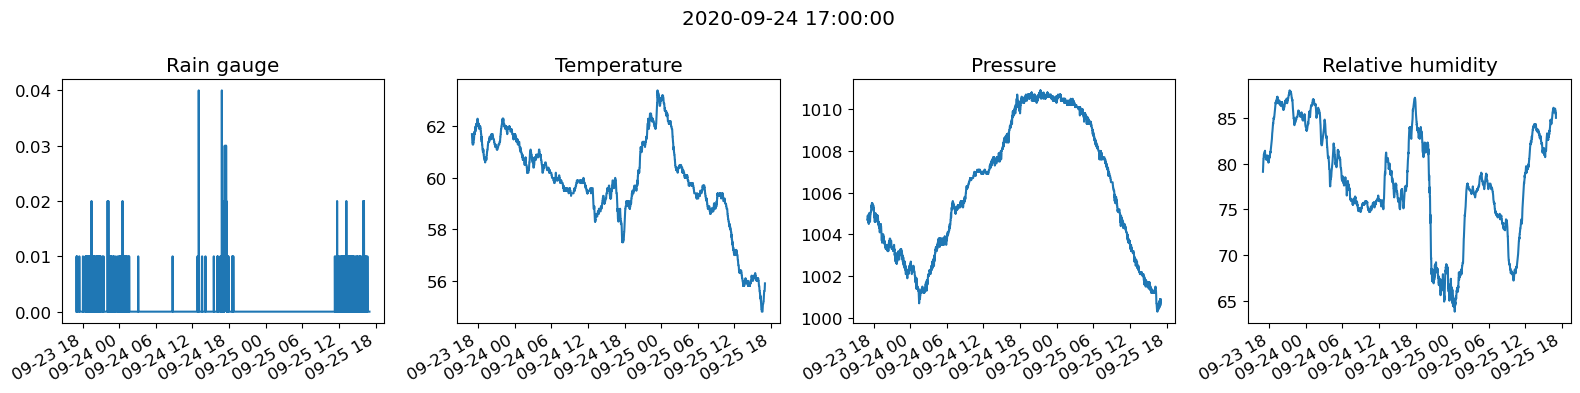

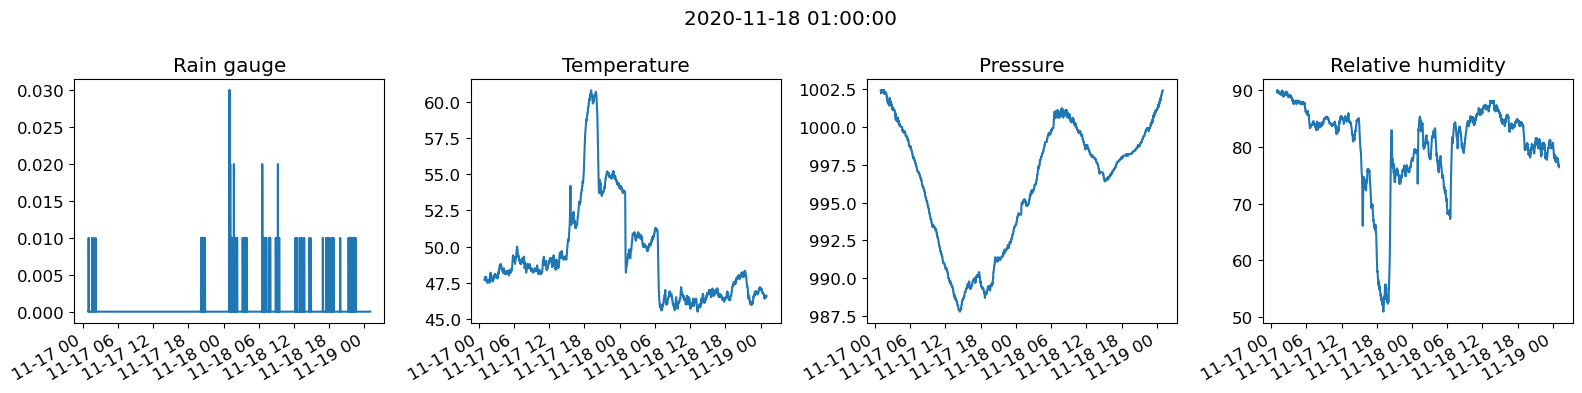

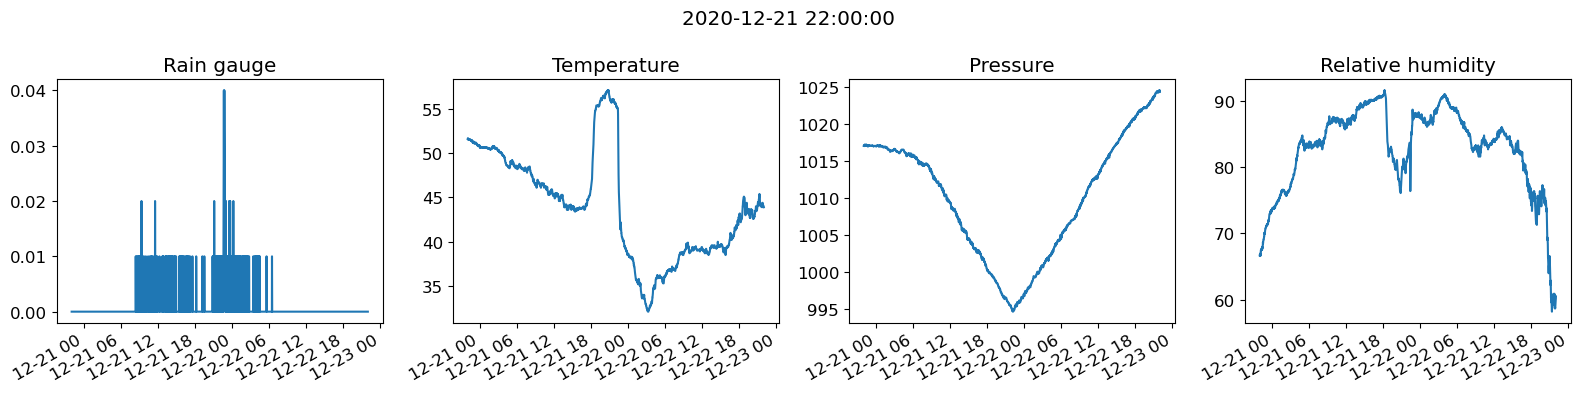

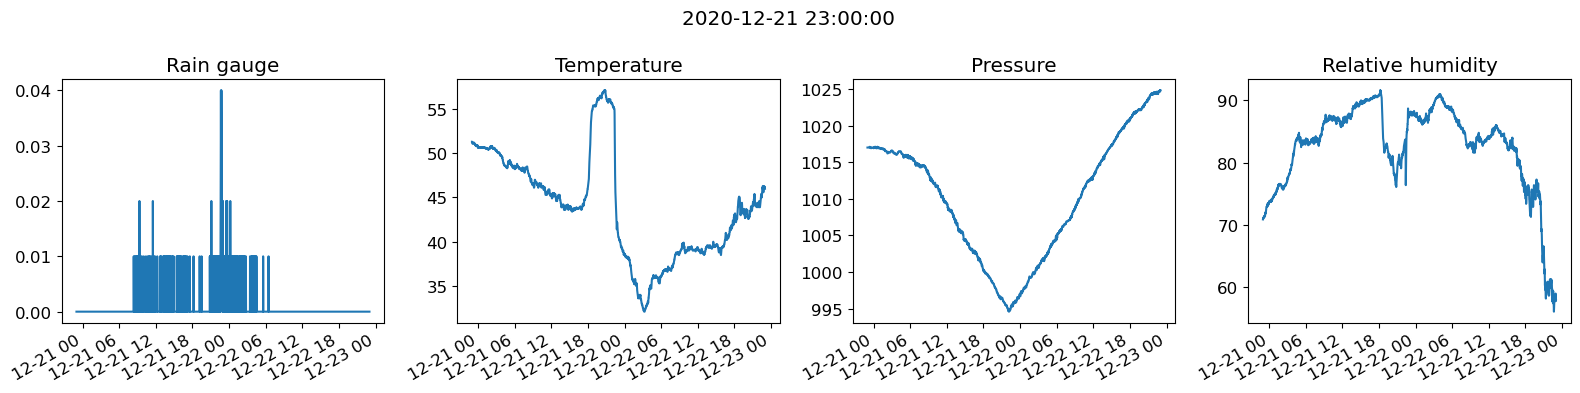

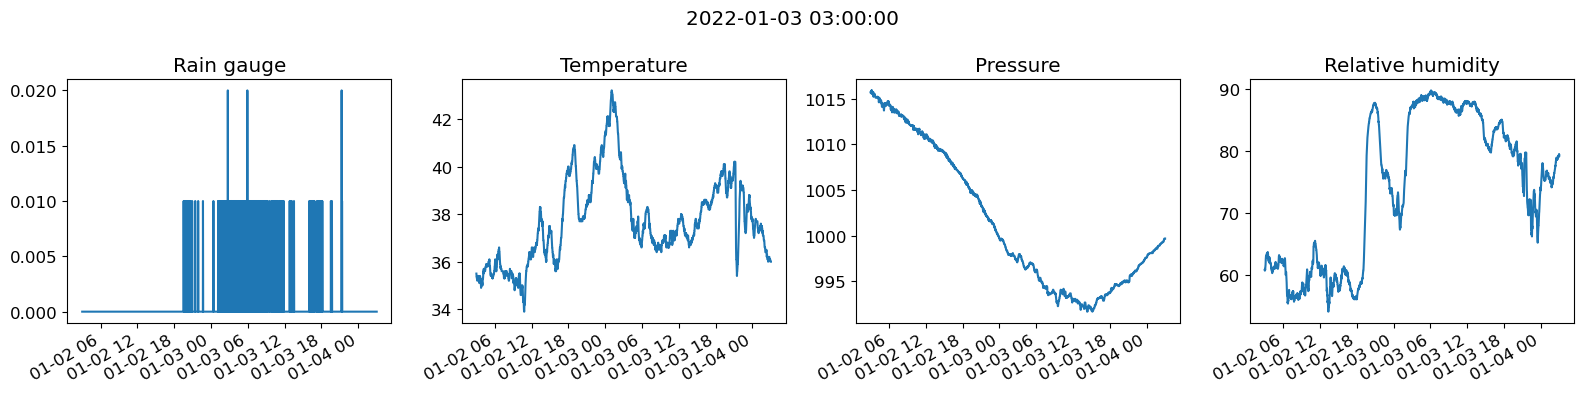

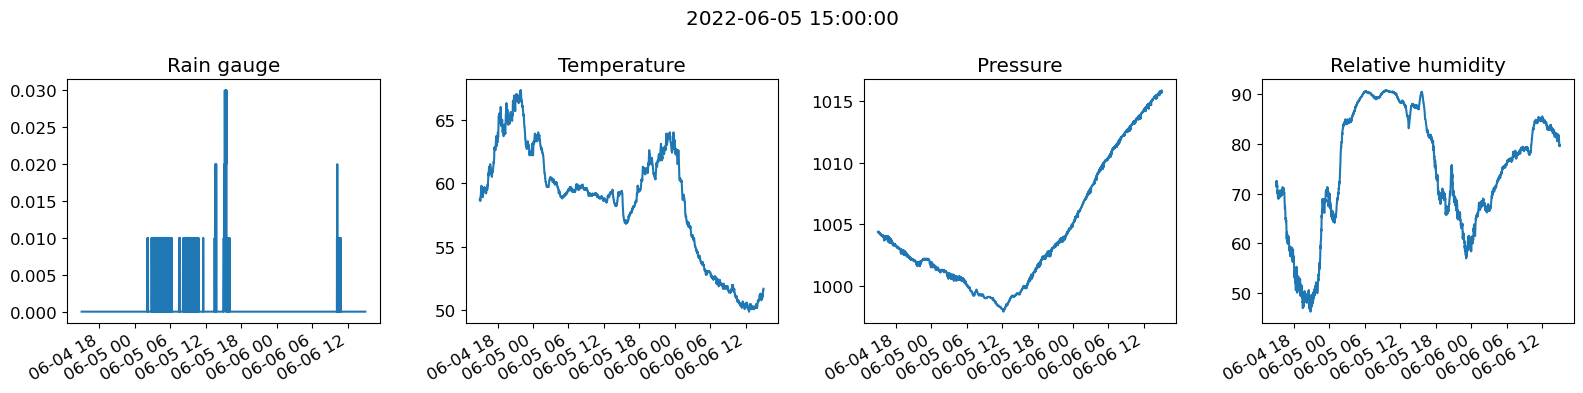

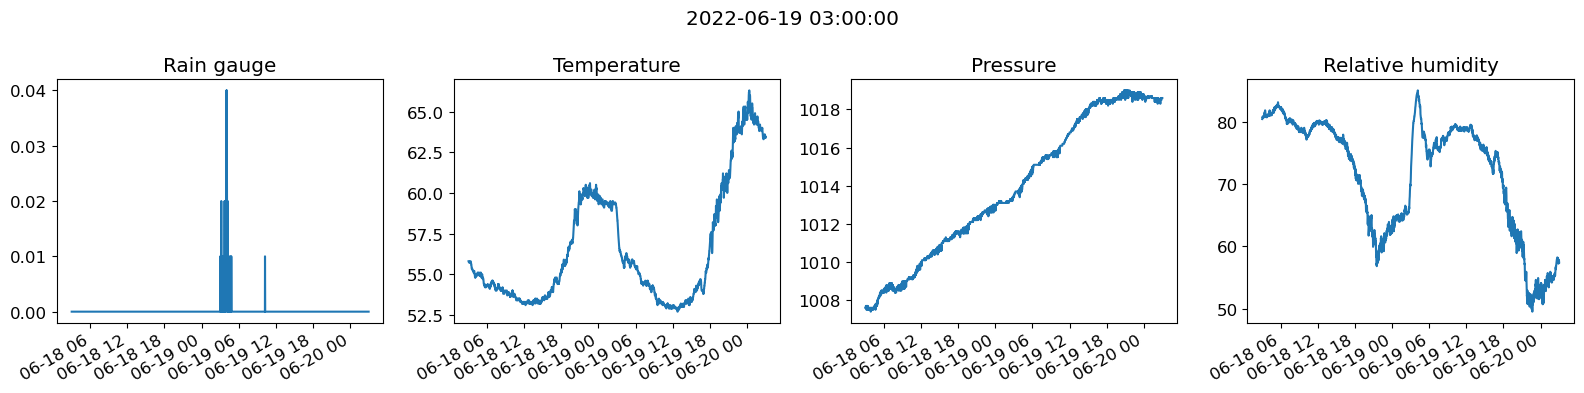

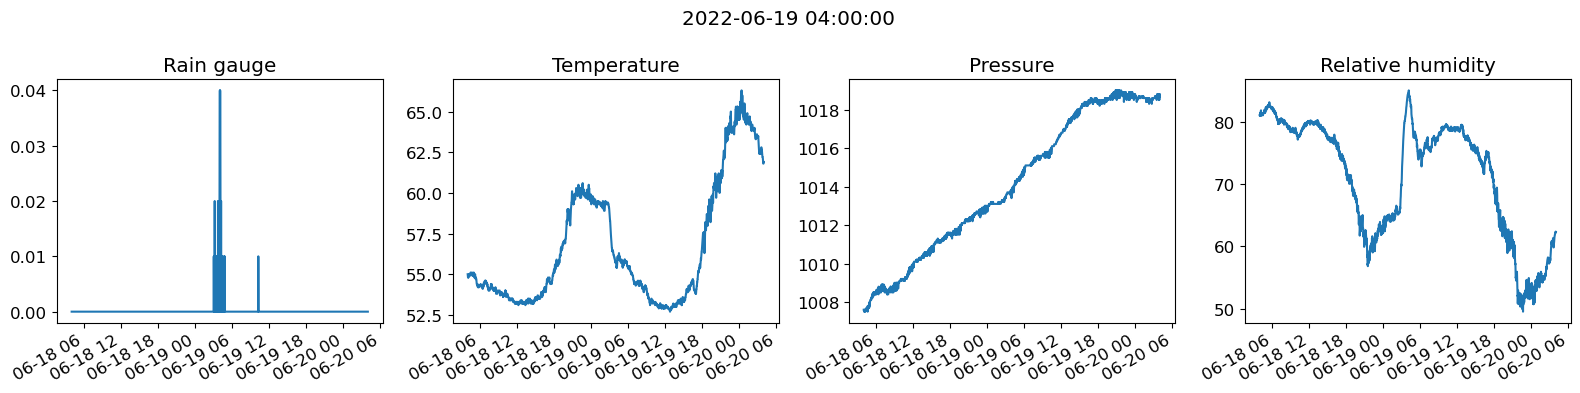

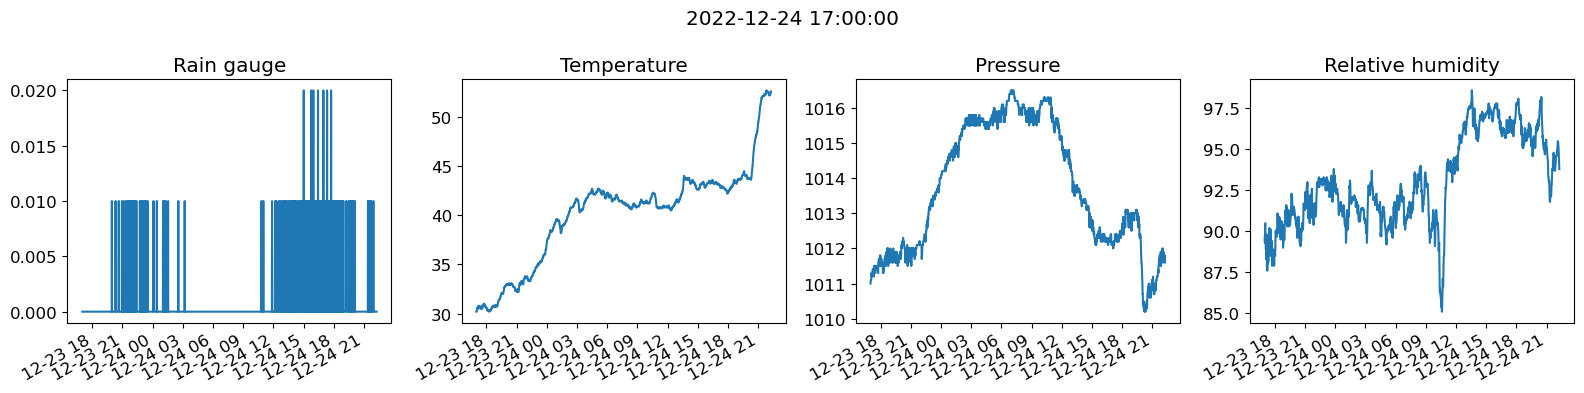

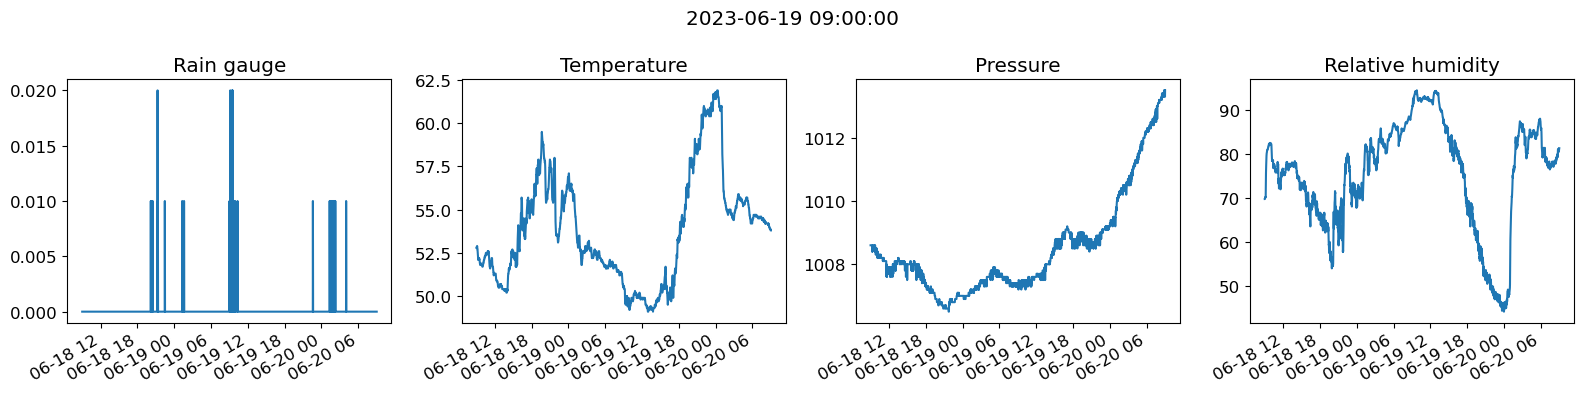

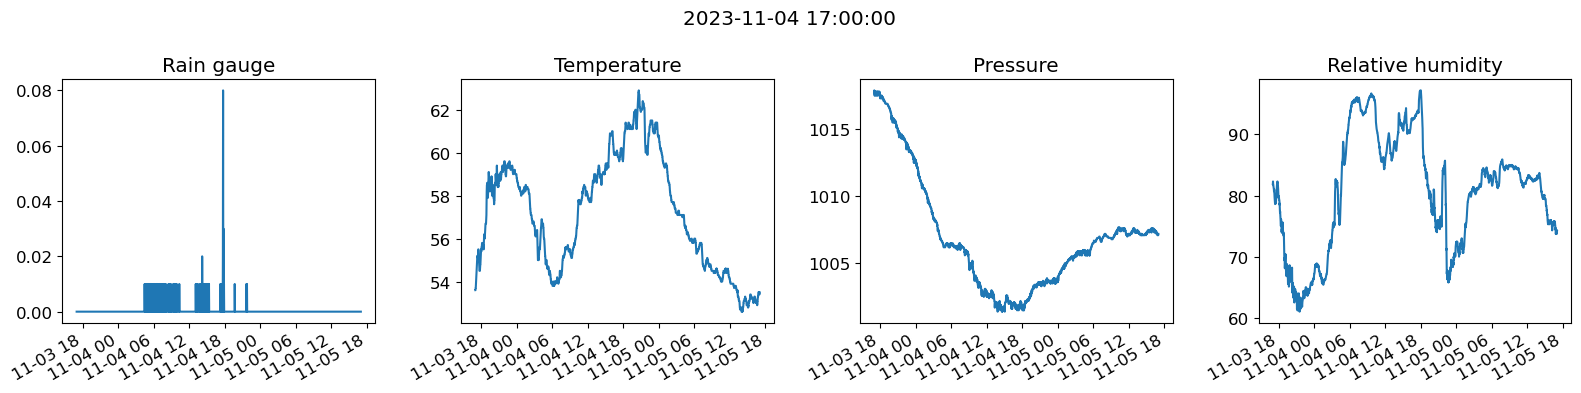

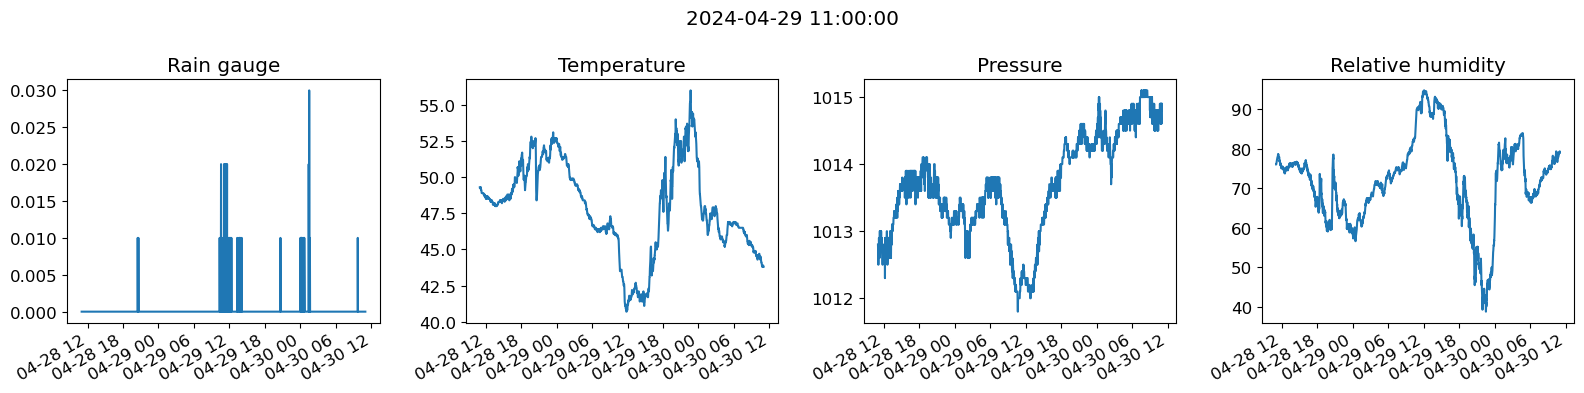

In [30]:
dt_obs = no_erros_obs.set_index('datetime_UTC')
for rain_dt in heavyrainfall_times.index:
    event_df = dt_obs.loc[rain_dt - pd.Timedelta(hours=24):rain_dt + pd.Timedelta(hours=24)]
    plt.figure(figsize=(16,4))
    plt.suptitle(f'{rain_dt}')

    plt.subplot(141)
    plt.title('Rain gauge')
    plt.plot(event_df.index, event_df['Rain'])

    plt.subplot(142)
    plt.title('Temperature')
    plt.plot(event_df.index, event_df['Temperature'])

    plt.subplot(143)
    plt.title('Pressure')
    plt.plot(event_df.index, event_df['Pressure'])

    plt.subplot(144)
    plt.title('Relative humidity')
    plt.plot(event_df.index, event_df['Relhum'])
    plt.gcf().autofmt_xdate()

    plt.tight_layout()
    plt.show()